In [1]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shap






/Users/devonstreelman/Documents/ECS170/the-greatest-team/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("../data/dataset2cleaned.csv")

# Split features and target label
X = df.drop(columns=['genre'])  # Features
y = df['genre']  # Target (genre label)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42 )

# Train the model
xgb_model.fit(X_train_xgb, y_train_xgb)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate model
print("XGBoost")
print("Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test_xgb, y_pred_xgb))

XGBoost
Accuracy: 0.826

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       216
           1       0.76      0.73      0.75       190
           2       0.83      0.86      0.85       192
           3       0.84      0.84      0.84       210
           4       0.73      0.74      0.74       192

    accuracy                           0.83      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.83      0.83      0.83      1000



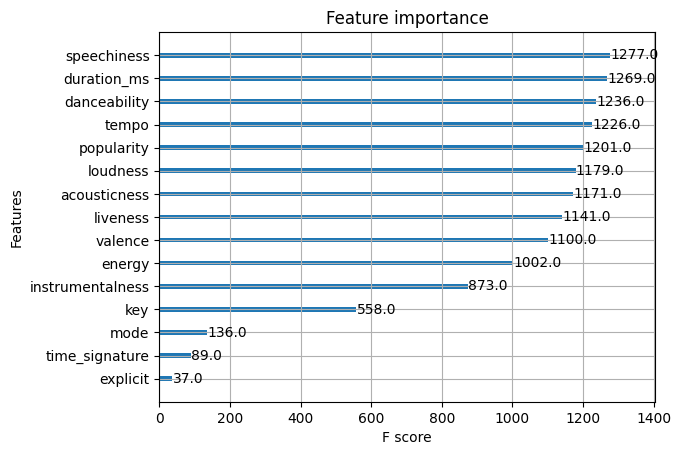

In [3]:
xgb.plot_importance(xgb_model)
plt.show()

In [8]:
df = pd.read_csv("../data/dataset2cleaned.csv")

# Split features and target label
X = df.drop(columns=['genre'])  # Features
y = df['genre']  # Target (genre label)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

 # ------------------------------------------------------------------------------------------------------------------------

# Drop features with low importance
X = X.drop(['mode', 'time_signature', 'explicit'], axis=1)

# Print the columns
print(X.columns)

# Split into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=100)

# Train the model
xgb_model.fit(X_train_xgb, y_train_xgb)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate model
print("XGBoost")
print("Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test_xgb, y_pred_xgb))


Index(['popularity', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')
XGBoost
Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       216
           1       0.78      0.73      0.75       190
           2       0.85      0.84      0.85       192
           3       0.84      0.88      0.86       210
           4       0.73      0.74      0.73       192

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



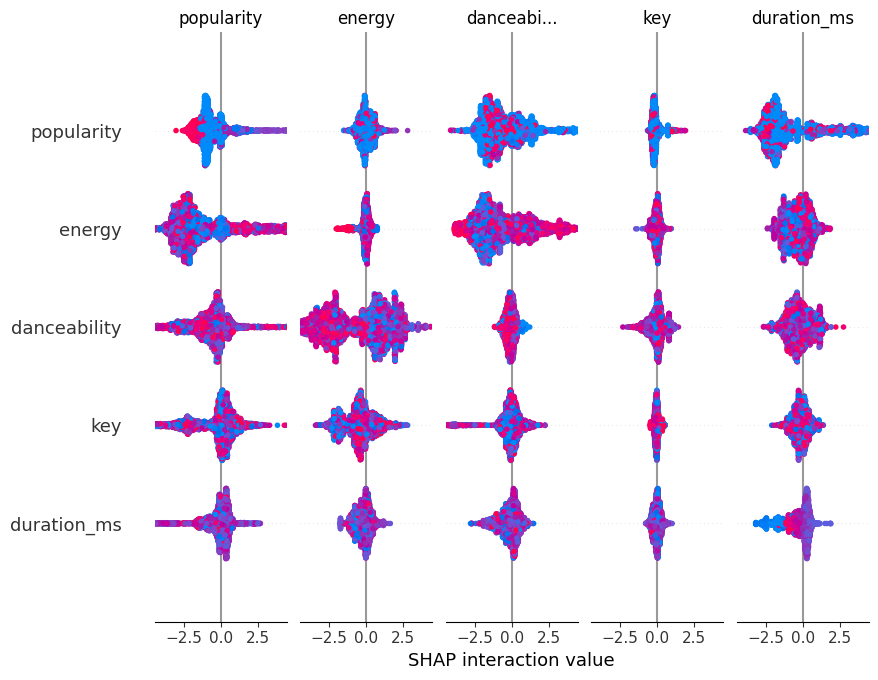

In [12]:
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train_xgb)

# Visualize feature importance
shap.summary_plot(shap_values, X_train_xgb)
# Average SHAP values across all classes
shap_values_mean = np.mean(shap_values, axis=0)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [6]:
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'min_child_weight': [1, 3, 5]
# }

# grid_search = GridSearchCV(
#     estimator=xgb.XGBClassifier(random_state=42),
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=2,
#     verbose=2
# )

# grid_search.fit(X_train_xgb, y_train_xgb)
# best_xgb_model = grid_search.best_estimator_

# # Evaluate best model
# y_pred_xgb = best_xgb_model.predict(X_test_xgb)
# print("Tuned XGBoost Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))


Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, subsample=1.0; total time= 

KeyboardInterrupt: 